# Daniel Ricardo Rodriguez Olarte 
Entregable 2

**ADVERTENCIA**
  si hay dificultad para ver las formulas de latex en el repositorio , aca dejo el link de colaboratory : https://colab.research.google.com/drive/1nY6gUktXFBF31Tt5nezYdDp70YcbdZfY?usp=sharing

**Ejercicio 1.12** 
La respuesta C. es la que mejor puedo prometer ,si logramos aprender y producir una hipótesis $ g $, dado que hay datos considerablemente altos, la probabilidad de que $ g $ coincida con $ f $ es alta según la desigualdad de Hoeffding, y el error en $ g $ podría ser pequeño ya que tenemos un gran conjunto de datos.aunque nunca se sabe que tan grande son necesarios los datos para aprender lo suficiente asi que es posible que podamos fracasar en el intento.

**Problem 1.2**

a)
si h(x)=+1 entonces $w^Tx \gt 0$ y si h(x)=-1 tenemos $w^Tx \lt 0$ , por la tanto las dos regiones son separadas por la linea $w^Tx = w_0 + w_1 x_1 + w_2 x_2 = 0$ que como dice el enunciado la podemos expresar  $x_2 = ax_1 + b$ que sería equivalente a $x_2 =  -\frac{w_1}{w_2}x_1  -\frac{w_0}{w_2}$ por lo tanto  $ a = -\frac{w_1}{w_2}$ and $b =  -\frac{w_0}{w_2}$.

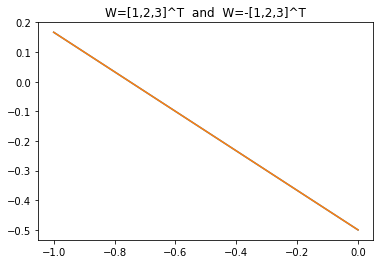

In [ ]:
b)
from matplotlib import pyplot
x = range(-1, 1)
#x2=ax1+b
a1=-2/3
b2=-1/2
def f(x):
   return (a*x+b)
pyplot.plot(x, [f(i) for i in x])
pyplot.title("W=[1,2,3]^T  and  W=-[1,2,3]^T" )
pyplot.plot(x, [f(i) for i in x])
pyplot.show()

#las graficas son las mismas ya que el signo no altera la recta

**Problem 1.4**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

%matplotlib inline

def perceptron(points, dim, max_it=100,  
                randomize=False, print_out = False): #funcion que nos separa datos linealmente 
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y 
            if prod < -100: # evitar errores fuera de límites
                st = -100
            threshold = 0
            st = 0
            if prod <= threshold:
                w = w + (y-st)*x
                break 
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break
    
    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod > 0:
            c +=1
    w = w/w[-1]
    if print_out:
        print('Total de iteraciones: ', it)
    return w, it

def generate_random_numbers01(N, dim, num_grid_points):
    random_ints = np.random.randint(num_grid_points, size=(N, dim))
    init_lb = 0
    return (random_ints - init_lb)/(num_grid_points - 1 - init_lb)

def generate_random_numbers(N, dim, num_grid_points, lb, ub):
    zero_to_one_points = generate_random_numbers01(N, dim, num_grid_points)
    res = lb + (ub - lb)*zero_to_one_points
    return res
def true_f(x, coeffs):
    return coeffs.flatten()[0] + np.dot(coeffs.flatten()[1:], x.flatten())

def dimensiones2(N, dim, true_func, rn_func): #para data frame
    cls1, cls2 = [], []
    while True:
        rn = rn_func(1, dim).flatten()
        if true_func(rn) > 0 and len(cls1) < N:
            cls1.append(rn)
        elif true_func(rn) < 0 and len(cls2) < N:
            cls2.append(rn)
        if len(cls1) == N and len(cls2) == N:
            break
    return np.asarray(cls1), np.asarray(cls2)    

def generate_df(N, dim,true_func, rn_func): #generador de data frame
    cls1, cls2 = dimensiones2(N/2, dim, true_func, rn_func)
    cols = ['x' + str(i) for i in range(1, dim+1)]
    df1 = pd.DataFrame(cls1, columns=cols)
    df1['y'] = 1
    df2 = pd.DataFrame(cls2, columns=cols)
    df2['y'] = -1
    df = pd.concat([df1, df2])
    df['x0'] = 1
    df = df[['x0'] + cols + ['y']]
    return df

def plot_data(x1, df, norm_coeffs, norm_g, lb, ub): # para imprimir o no imprimir los datos
        figsize = plt.figaspect(1)
        f, ax = plt.subplots(1, 1, figsize=figsize)
        cls1_df = df.loc[df['y']==1]
        cls2_df = df.loc[df['y']==-1]
        line = ax.plot(x1, -(norm_coeffs[0]+norm_coeffs[1]*x1),c='y' ,label='Target Function')
        pluses = ax.scatter(cls1_df[['x1']].values, cls1_df[['x2']].values, marker='.', c= 'r', label='+1 labels')
        minuses = ax.scatter(cls2_df[['x1']].values, cls2_df[['x2']].values, marker=r'$-$', c= 'b', label='-1 labels')
        if norm_g is not None:
            hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'r', label='Final Hypothesis')

        ax.set_ylabel(r"$x_2$", fontsize=13)
        ax.set_xlabel(r"$x_1$", fontsize=13)
        ax.set_title('Numero de datos = %s'%N, fontsize=15)
        ax.axis('tight')
        legend_x = 2.0
        legend_y = 0.5
        ax.legend(['Target Function', 'Final Hypothesis', 
                   '+1 labels', '-1 labels', ], 
                  loc='center right', bbox_to_anchor=(legend_x, legend_y))
        ax.set_ylim(bottom=lb, top=ub)
        plt.show()
def plot_data2(x1, df, norm_coeffs, norm_g, lb, ub): #para imprimir los datos con las dos funciones
        figsize = plt.figaspect(1)
        f, ax = plt.subplots(1, 1, figsize=figsize)
        cls1_df = df.loc[df['y']==1]
        cls2_df = df.loc[df['y']==-1]
        line = ax.plot(x1, -(norm_coeffs[0]+norm_coeffs[1]*x1),c='y', label='Target Function')
        pluses = ax.scatter(cls1_df[['x1']].values, cls1_df[['x2']].values, marker='.', c= 'r', label='+1 labels')
        minuses = ax.scatter(cls2_df[['x1']].values, cls2_df[['x2']].values, marker=r'$-$', c= 'b', label='-1 labels')

        ax.set_ylabel(r"$x_2$", fontsize=13)
        ax.set_xlabel(r"$x_1$", fontsize=13)
        ax.set_title('Numero de datos = %s'%N, fontsize=15)
        ax.axis('tight')
        legend_x = 2.0
        legend_y = 0.5
        ax.legend(['Target Function',
                   '+1 labels', '-1 labels', ], 
                  loc='center right', bbox_to_anchor=(legend_x, legend_y))
        ax.set_ylim(bottom=lb, top=ub)
        plt.show()
        
def run_perceptron_experiment(N, dim, lb, ub, 
                                maxit, randomize=False,
                              show_plot=True, test_N = 10000,num_grid_points=2000,plotdata=False,print_out = False): #función principal para solucionar el problema
    
    rns = generate_random_numbers(N, dim, num_grid_points, lb, ub)
    rn_func = partial(generate_random_numbers, num_grid_points = num_grid_points, lb = lb, ub = ub)
    coeffs = generate_random_numbers(1, dim+1, num_grid_points, -10, 10)
    norm_coeffs = coeffs.flatten()/coeffs.flatten()[-1]
    true_func = partial(true_f, coeffs = norm_coeffs)
    
    df = generate_df(N, dim, true_func, rn_func)
    test_df = generate_df(test_N, dim, true_func, rn_func)
    
    x1 = np.arange(lb, ub, 0.01)
   
    norm_g, num_its = perceptron(df.values, dim, maxit, 
                                  randomize,print_out )
    
    
    if show_plot:
        if plotdata==False :
         plot_data2(x1, df, norm_coeffs, norm_g, lb, ub)
        else:
         plot_data(x1, df, norm_coeffs, norm_g, lb, ub)
    return num_its, norm_g, test_df
#este código fue diseñado inicialmente por Neil Z alias niuers. 

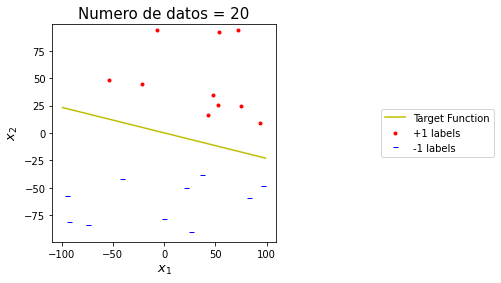

In [ ]:
# problem 1.4 (a)
lb, ub = -99, 99
N, dim = 20, 2 
_, _, _ = run_perceptron_experiment(N, dim, lb, ub , maxit=100,randomize=False,plotdata=False,print_out = False)

Total de iteraciones:  2


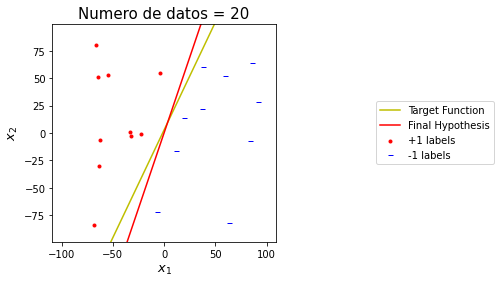

In [ ]:
# problem 1.4 (b)
lb, ub = -99, 99
N, dim = 20, 2 
_, _, _ = run_perceptron_experiment(N, dim, lb, ub , maxit=100,randomize=False,plotdata=True,print_out = True)

Total de iteraciones:  5


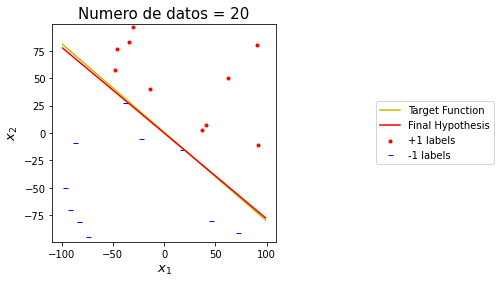

In [ ]:
# problem 1.4 (c)
lb, ub = -99, 99
N, dim = 20, 2 
_, _, _ = run_perceptron_experiment(N, dim, lb, ub , maxit=100,randomize=True,plotdata=True,print_out = True)

Total de iteraciones:  31


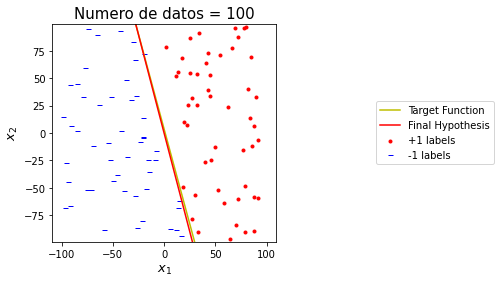

In [ ]:
# problem 1.4 (d)
lb, ub = -99, 99
N, dim = 100, 2 
_, _, _ = run_perceptron_experiment(N, dim, lb, ub , maxit=100,randomize=True,plotdata=True,print_out = True)

Total de iteraciones:  1838


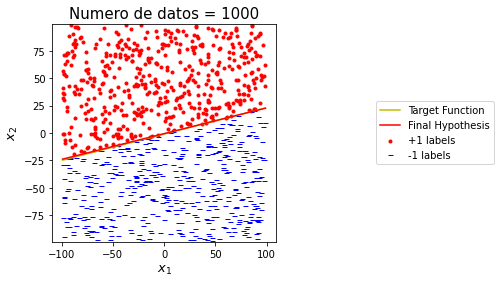

In [ ]:
# problem 1.4 (e)
lb, ub = -99, 99
N, dim = 1000, 2 
_, _, _ = run_perceptron_experiment(N, dim, lb, ub , maxit=2000,randomize=True,plotdata=True,print_out = True)

In [ ]:
# problem 1.4 (f)
lb, ub = -99, 99
N, dim = 1000, 10
_, _, _ = run_perceptron_experiment(N, dim, lb, ub ,show_plot=False, maxit=50000,randomize=True,plotdata=False,print_out = True)

Total de iteraciones:  5338


(array([43., 35., 12.,  6.,  1.,  1.,  0.,  1.,  0.,  1.]),
 array([  963. ,  4274.2,  7585.4, 10896.6, 14207.8, 17519. , 20830.2,
        24141.4, 27452.6, 30763.8, 34075. ]),
 <a list of 10 Patch objects>)

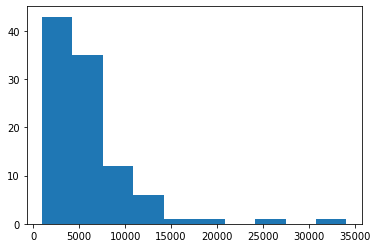

In [ ]:

#### problem 1.4 (g)
lb, ub = -99, 99
N, dim = 1000, 10 
num_iterations = []
for it in range(100):
    num_it, _, _ = _, _, _ = run_perceptron_experiment(N, dim, lb, ub ,show_plot=False, maxit=50000,randomize=True,plotdata=False,print_out = False)
    num_iterations.append(num_it)
    
plt.hist(num_iterations)

**Problem 1.6**

a) como  $P(\nu=0) = (1-\mu)^{10}$ entonces $P(\nu = 0) = 0.5987369392383789$ cuando$\mu = 0.05$ , $P(\nu = 0) =  0.0009765625$ cuando $\mu = 0.5$ y $P(\nu = 0) = 0.0000001024$ cuando $\mu = 0.8$
 

 b) para sola una muestra tenemos que $P(\nu \gt 0) = 1-P(\nu = 0) = 1-(1-\mu)^{10}$. para 1000 tendriamos que :$P(\cap_{i=1}^{1000} \nu_{i} \gt 0) = \prod_{i=1}^{1000}P(\nu_i \gt 0) = \prod_{i=1}^{1000}[1-(1-\mu)^{10}] =[1-(1-\mu)^{10}]^{1000}$
 luego la probabilidad de que almenos una muestra tenga v=0 es: $1-P(\cap_{i=1}^{1000} \nu_{i} \gt 0) = 1-[1-(1-\mu)^{10}]^{1000}$ , por  lo tanto , cuando$\mu = 0.05$ la $P=1$ cuando $\mu = 0.5$ la $P = 0.623576201943276$  y cuando $\mu = 0.8$ la $P = 0.00010239476257623004$ 


 c)para 1000000 muestras, la probabilidad será P= $1-P(\cap_{i=1}^{1000000} \nu_{i} \gt 0) = 1-[1-(1-\mu)^{10}]^{1000000}$ por lo tanto 
cuando $\mu = 0.05$, $P = 1$
 cuando  $\mu = 0.5$ ,$P = 1$
cuando$\mu = 0.8$ ,$P = 0.09733159268316072$

**Problem 1.9**

a)Por la desigualdad de Markov y si tenemos una variable aleatoria t y un $\alpha$>0 y s>0 entonces
\begin{align*}
P[t \ge \alpha] = P[st\ge s\alpha ]= P[e^{st}\ge e^{s\alpha}]\le \frac{E(e^st)}{e^{s\alpha}}=e^{-\alpha t}T(s)\\
\end{align*}

b)
$
P[u \ge \alpha]= P[Nu \ge N\alpha]\le e^{-sN\alpha}E[e^{s\sum_{n=1}^{N}u_n}]= e^{-sN\alpha}\prod_{n=1}^{N}E[e^{su_n}]=e^{-sN\alpha}E[e^{su_n}]^N = \left(e^{-s\alpha}U(s)\right)^N $

c)
$U(s) = E(e^{su_n}) = P(u_n=0)e^0 + P(u_n=1)e^s = \frac{1}{2}(1+e^s)$, luego para minimizar $e^{-s\alpha}U(s)$ derivamos e igualamos a $0$
$$\begin{align*}
\frac{\partial{e^{-s\alpha}U(s)}}{\partial{s}}=-\alpha e^{-s\alpha}\frac{1}{2}(1+e^s) + e^{-s\alpha}\frac{1}{2}e^s= 0\\
\end{align*}$$ , por lo tanto
$s = ln{\frac{\alpha}{1-\alpha}}$ si $0 \lt \alpha \lt 1$.



**Problem 1.12**

a)Tomamos la derivada de $E_{in}(h)$ $$\begin{align*}
\frac{\partial{E_{in}(h)}}{\partial{h}} = \sum_{n=1}^{N}2(h-y_n)=0 \\
\sum_{n=1}^{N}(h-y_n)=0 \\
\sum_{n=1}^{N}(h)=\sum_{n=1}^{N}(y_n)\\
h = \frac{1}{N} \sum_{n=1}^{N}y_n = h_{mean}\\
\end{align*}$$
b)Tomamos la derivada de $E_{in}(h)$ $$\begin{align*}
\frac{\partial{E_{in}(h)}}{\partial{h}}= \sum_{n=1}^{N}(h - y_n) \\
\end{align*}=0$$ 
por lo que $h=mediana(y_{1},y_{2},...., y_{n}) = h_{med}$ y $h_{med}$ hará que la derivada sea cero, por lo que minimizará el error en la muestra solo si el número de términos positivos es igual al número de términos negativos.

c) $h_{mean}$ crecerá mucho ya que  $y_N$ es fundamental en su resultado,pero $h_{med}$ quedaría igual si se mantiene la condición de que  $h_{med} \lt y_{N}$.